In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
DT = pd.read_csv('C:\\Users\\admin\\Desktop\\DATA SCIENCE\\assignments\\Linear regression\\delivery_time.csv')

In [4]:
DT

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
DT.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
#making the data types same
DT['Sorting Time'] = DT['Sorting Time'].astype('float64')

In [7]:
DT

,Delivery Time,Sorting Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [8]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [9]:
#checking for any missing values
DT.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

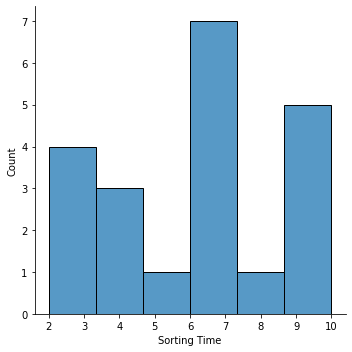

In [10]:
sns.displot(DT['Sorting Time'])

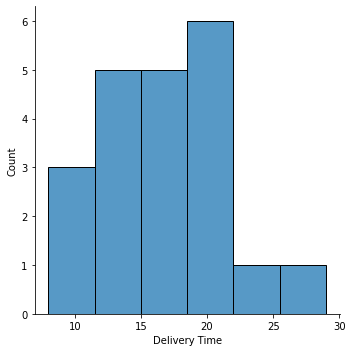

In [11]:
sns.displot(DT['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

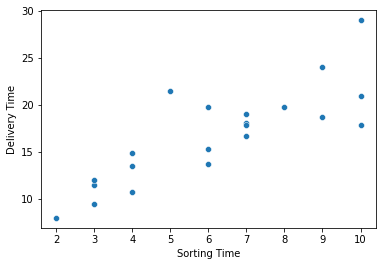

In [12]:
#Checking relation between dependant and independant variables
# Sorting Time is the independant variable while Delivery Time is the dependant variable
sns.scatterplot(x = 'Sorting Time' , y = 'Delivery Time' , data = DT)

In [ ]:
# Renaming the columns to make it shorter for the ease of making the model

In [13]:
DT = DT.rename({'Delivery Time':'DelTime'} , axis =1)

In [14]:
DT = DT.rename({'Sorting Time':'SortTime'} , axis =1)

In [15]:
DT

,DelTime,SortTime
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [16]:
DT.corr()

,DelTime,SortTime
DelTime,1.000000,0.825997
SortTime,0.825997,1.000000


In [ ]:
# Making the model

In [17]:
model = smf.ols("DelTime~SortTime" , data = DT).fit()

<AxesSubplot:xlabel='SortTime', ylabel='DelTime'>

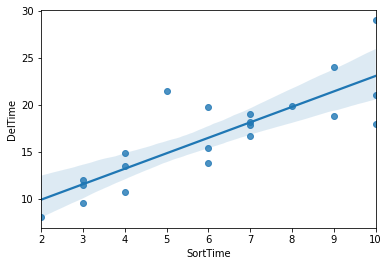

In [18]:
sns.regplot(x = 'SortTime' , y = 'DelTime' , data = DT)

In [ ]:
# Testing the model

In [19]:
model.rsquared

0.6822714748417231

In [20]:
model.params

Intercept    6.582734
SortTime     1.649020
dtype: float64

In [21]:
model.pvalues

Intercept    0.001147
SortTime     0.000004
dtype: float64

In [22]:
# Predicted values
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [23]:
DT['Predicted'] = model.fittedvalues

In [24]:
DT

,DelTime,SortTime,Predicted
0,21.00,10.0,23.072933
1,13.50,4.0,13.178814
2,19.75,6.0,16.476853
3,24.00,9.0,21.423913
4,29.00,10.0,23.072933
5,15.35,6.0,16.476853
6,19.00,7.0,18.125873
7,9.50,3.0,11.529794
8,17.90,10.0,23.072933
9,18.75,9.0,21.423913


In [25]:
Error = DT['Predicted']-DT['DelTime']

In [26]:
DT['Error'] = Error

In [27]:
DT

,DelTime,SortTime,Predicted,Error
0,21.00,10.0,23.072933,2.072933
1,13.50,4.0,13.178814,-0.321186
2,19.75,6.0,16.476853,-3.273147
3,24.00,9.0,21.423913,-2.576087
4,29.00,10.0,23.072933,-5.927067
5,15.35,6.0,16.476853,1.126853
6,19.00,7.0,18.125873,-0.874127
7,9.50,3.0,11.529794,2.029794
8,17.90,10.0,23.072933,5.172933
9,18.75,9.0,21.423913,2.673913
